# Diabetes Analysis of Pima Indians Dataset

**Objective:** 
The goal of this project is to analyze the Pima Indians Diabetes dataset to identify
key medical and demographic factors associated with diabetes.
The insights can help support early risk assessment and preventive healthcare decisions.

**Column Meaning**
- **Pregnancies**:	Number of pregnancies	
- **Glucose**	:Plasma glucose level	
- **BloodPressure**:	Diastolic BP	
- **SkinThickness**:	Triceps skin fold	
- **Insulin**:	2-hour serum insulin	
- **BMI**:	Body Mass Index	
- **DiabetesPedigreeFunction**:	Genetic risk score	
- **Age**: Age of the patient
- **Outcome**: Diabetes diagnosis (1 = Diabetic, 0 = Non-diabetic)


## Setup Libraries and Load Dataset

In [117]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load data

df = pd.read_csv("diabetes.csv")

## Initial Exploration

In [118]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [119]:
df.shape

(768, 9)

## Data Quality Checks

In [149]:
# Check structure and data type
df.info()

# Explore the statistics summary of the data
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   BMI                       768 non-null    float64 
 5   DiabetesPedigreeFunction  768 non-null    float64 
 6   Age                       768 non-null    int64   
 7   Outcome                   768 non-null    int64   
 8   BMI_Category              768 non-null    object  
 9   AgeGroup                  768 non-null    category
 10  PregnancyGroup            768 non-null    object  
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 61.1+ KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.089844,8.890820,7.000,25.00000,28.0000,32.00000,99.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Checking Nulls, Invalid Values and Duplicates

In [121]:
# check for null values
pd.isnull(df).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Zero values in clinical fields are medically impossible, so they were treated as missing values and imputed using statistics to avoid bias.**

In [122]:
# 0 values in Glucose, BP, SkinThickness, Insulin, BMI = missing, not real zeros.
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [123]:
df[cols] = df[cols].replace(0, np.nan)

In [124]:
df[cols].isna().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [125]:
df[cols].isna().mean() * 100

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

In [126]:
#Impute columns that have null values <5%
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())


In [127]:
#Impute columns that have null values 5–30%
df['SkinThickness'] = df.groupby('Outcome')['SkinThickness']\
                        .transform(lambda x: x.fillna(x.median()))


In [128]:
df.drop(columns=['Insulin'], inplace=True)

**Clinical variables with medically invalid zero values were treated as missing.
Variables with low missingness (<5%) were imputed using median values.
SkinThickness was imputed using outcome-wise medians to preserve class differences.
Insulin, with ~49% missing values, was drop.**

In [129]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [130]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

***There is no duplicates.***

## Adding Featured Columns

In [131]:
def add_features(data_frame):
    
    # BMI category
    data_frame["BMI_Category"] = "obese (>29.9)"

    data_frame.loc[(data_frame["BMI"] >= 0) & (data_frame["BMI"] < 18.5), "BMI_Category"] = "underweight (<18.5)"
    data_frame.loc[(data_frame["BMI"] >= 18.5) & (data_frame["BMI"] <= 24.9), "BMI_Category"] = "normal (18.5-24.9)"
    data_frame.loc[(data_frame["BMI"] >= 25) & (data_frame["BMI"] <= 29.9), "BMI_Category"] = "overweight (25-29.9)"

    # Age groups (decades)
    bins = [0, 17, 29, 44, 59, 74, 120]
    labels = [
        "Teen", 
        "Young Adult", 
        "Early Middle Age", 
        "Late Middle Age", 
        "Senior", 
        "Elderly"
    ]
    
    data_frame["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

    # Pregnancy groups
    data_frame["PregnancyGroup"] = "6+"

    data_frame.loc[df["Pregnancies"] == 0, "PregnancyGroup"] = "0"
    data_frame.loc[(df["Pregnancies"] >= 1) & (data_frame["Pregnancies"] <= 2), "PregnancyGroup"] = "1–2"
    data_frame.loc[(df["Pregnancies"] >= 3) & (data_frame["Pregnancies"] <= 5), "PregnancyGroup"] = "3–5"
    return data_frame

In [132]:
df = add_features(df)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,AgeGroup,PregnancyGroup
0,6,148.0,72.0,35.0,33.6,0.627,50,1,obese (>29.9),Late Middle Age,6+
1,1,85.0,66.0,29.0,26.6,0.351,31,0,overweight (25-29.9),Early Middle Age,1–2
2,8,183.0,64.0,32.0,23.3,0.672,32,1,normal (18.5-24.9),Early Middle Age,6+
3,1,89.0,66.0,23.0,28.1,0.167,21,0,overweight (25-29.9),Young Adult,1–2
4,0,137.0,40.0,35.0,43.1,2.288,33,1,obese (>29.9),Early Middle Age,0


#  Exploratory Data Analysis 

## Outcome Distribution

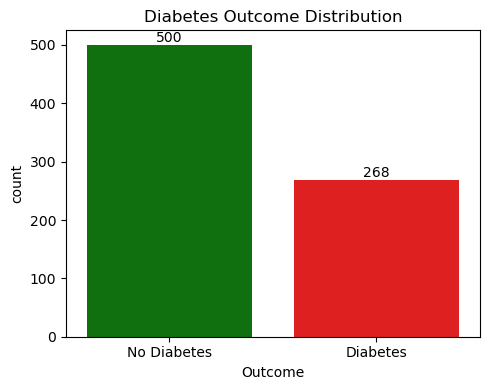

In [133]:
plt.figure(figsize=(5,4))

# define custom palette
palette = {0: 'green', 1: 'red'}

# create countplot with custom colors
ax = sns.countplot(x="Outcome", data=df, hue= "Outcome", palette=palette, legend=False)

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

ax.set_title("Diabetes Outcome Distribution")
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

## Glucose and BMI Analysis

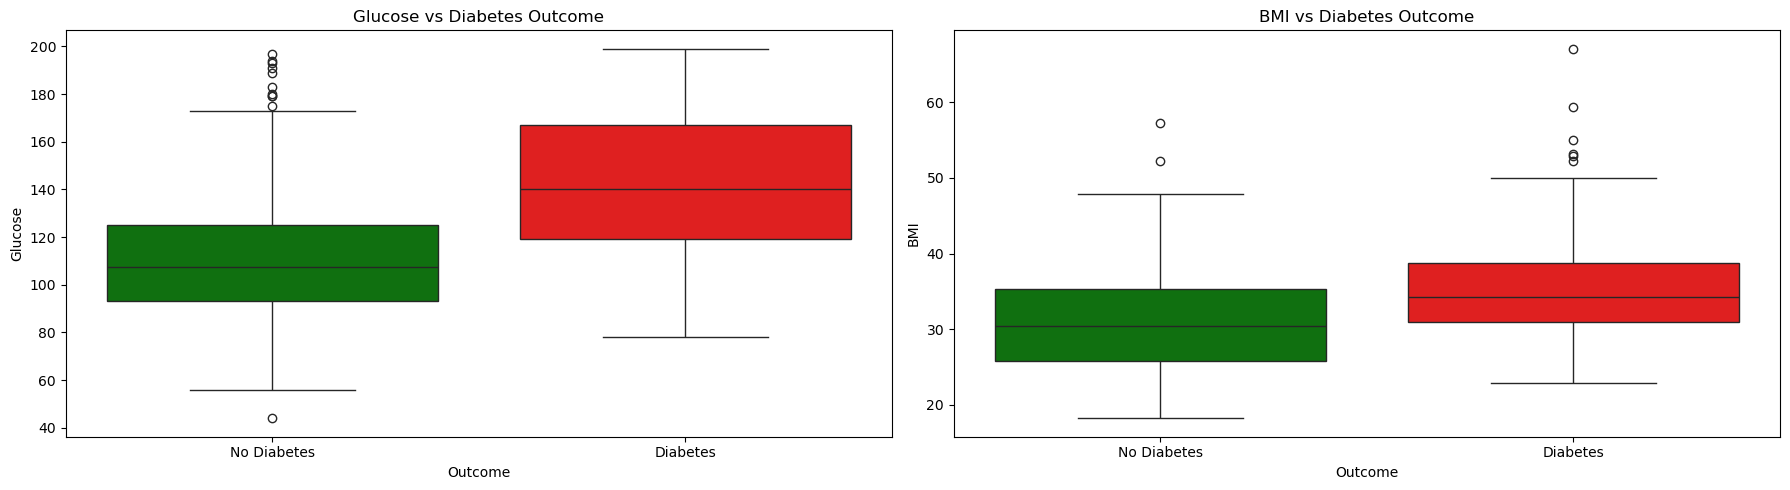

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

# Glucose
sns.boxplot(
    x='Outcome', y='Glucose',
    data=df, hue='Outcome',
    palette=palette, legend=False,
    ax=axes[0]
)
axes[0].set_title('Glucose vs Diabetes Outcome')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Diabetes', 'Diabetes'])


# BMI
sns.boxplot(
    x='Outcome', y='BMI',
    data=df, hue='Outcome',
    palette=palette, legend=False,
    ax=axes[1]
)
axes[1].set_title('BMI vs Diabetes Outcome')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Diabetes', 'Diabetes'])


plt.tight_layout()
plt.show()


- **Patients diagnosed with diabetes show noticeably higher glucose levels,
indicating glucose as a strong predictor of diabetes risk.**
- **Individuals with diabetes generally have higher BMI values**

In [135]:
bmi_outcome_pct =   df.groupby(['BMI_Category', 'Outcome'], as_index=False, observed=True).size()
bmi_outcome_pct['Percentage'] = (
    bmi_outcome_pct
    .groupby('BMI_Category', observed=False)['size']
    .transform(lambda x: (x / x.sum()) *100 )
)
bmi_outcome_pct

,BMI_Category,Outcome,size,Percentage
0,normal (18.5-24.9),0,95,93.137255
1,normal (18.5-24.9),1,7,6.862745
2,obese (>29.9),0,262,54.244306
3,obese (>29.9),1,221,45.755694
4,overweight (25-29.9),0,139,77.653631
5,overweight (25-29.9),1,40,22.346369
6,underweight (<18.5),0,4,100.000000


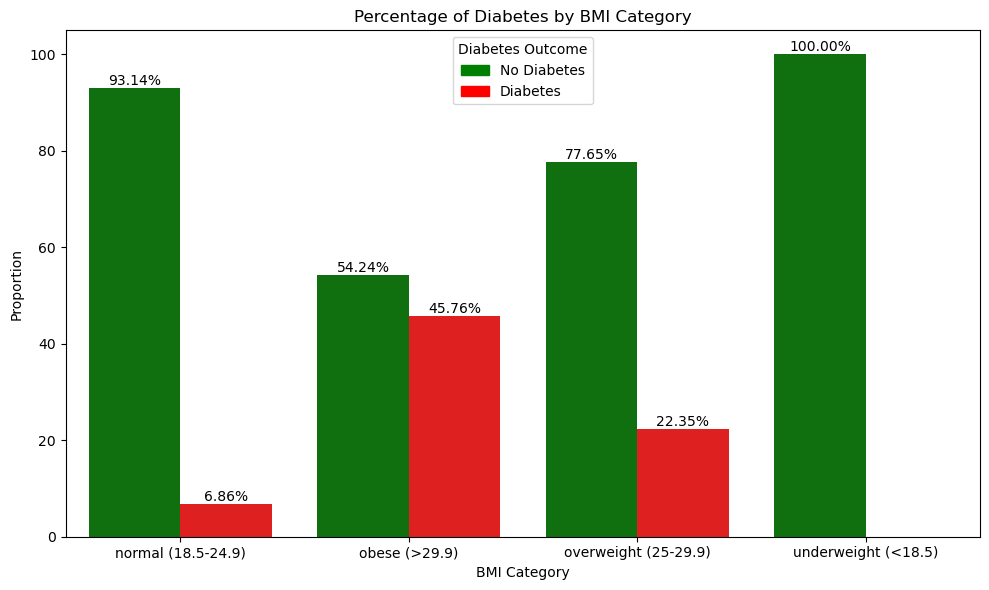

In [136]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=bmi_outcome_pct,
    x='BMI_Category',
    y='Percentage',
    hue='Outcome',     
    palette={0: 'green', 1: 'red'})

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%')

ax.set_title('Percentage of Diabetes by BMI Category')
ax.set_ylabel('Proportion')
ax.set_xlabel('BMI Category')

legend_patches = [mpatches.Patch(color='green', label='No Diabetes'),
                  mpatches.Patch(color='red', label='Diabetes')]

ax.legend(handles=legend_patches,
         title='Diabetes Outcome')
    
plt.tight_layout()
plt.show()

## Age and Diabetes

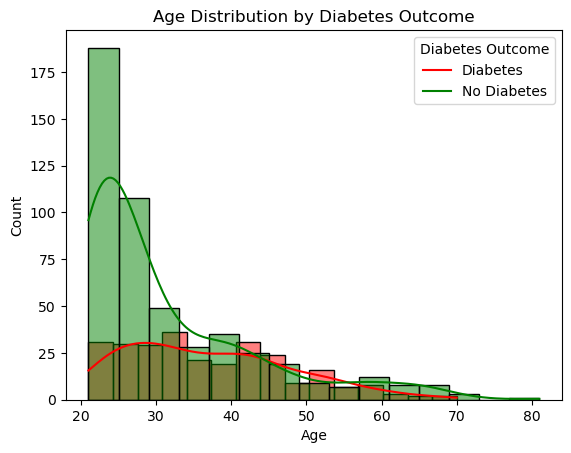

In [137]:
sns.histplot(df[df['Outcome']==1]['Age'], bins=15, kde=True, color='red', label='Diabetes')
sns.histplot(df[df['Outcome']==0]['Age'], bins=15, kde=True, color='green', label='No Diabetes')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

## Percent of Diabetes by Age Group

In [138]:
age_outcome_pct =   df.groupby(['AgeGroup', 'Outcome'], as_index=False, observed=True).size()
age_outcome_pct['Percentage'] = (
    age_outcome_pct
    .groupby('AgeGroup', observed=False)['size']
    .transform(lambda x: (x / x.sum()) *100 )
)
age_outcome_pct

,AgeGroup,Outcome,size,Percentage
0,Young Adult,0,312,78.787879
1,Young Adult,1,84,21.212121
2,Early Middle Age,0,121,50.627615
3,Early Middle Age,1,118,49.372385
4,Late Middle Age,0,44,43.564356
5,Late Middle Age,1,57,56.435644
6,Senior,0,22,70.967742
7,Senior,1,9,29.032258
8,Elderly,0,1,100.000000


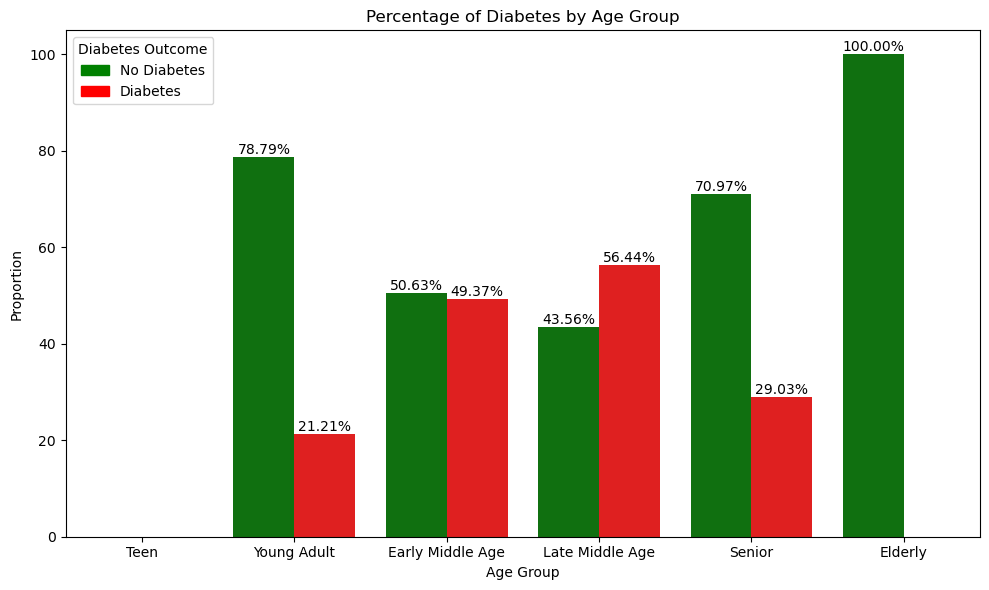

In [139]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=age_outcome_pct,
    x='AgeGroup',
    y='Percentage',
    hue='Outcome',     
    palette={0: 'green', 1: 'red'})

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%')

ax.set_title('Percentage of Diabetes by Age Group')
ax.set_ylabel('Proportion')
ax.set_xlabel('Age Group')

legend_patches = [mpatches.Patch(color='green', label='No Diabetes'),
                  mpatches.Patch(color='red', label='Diabetes')]

ax.legend(handles=legend_patches,
         title='Diabetes Outcome')
    
plt.tight_layout()
plt.show()

- ***Diabetes is more common in older individuals, though younger individuals can also be affected. Age contributes to risk but is not the sole factor.***

## Genetic Impact on Diabetes

**DiabetesPedigreeFunction (DPF) is a numeric score that estimates a person’s genetic risk of diabetes based on their family history.**

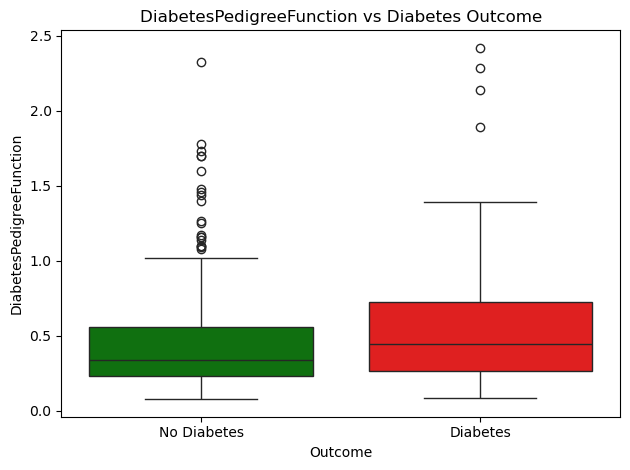

In [140]:
# SkinThickness Boxplot
ax = sns.boxplot(
    x='Outcome',
    y='DiabetesPedigreeFunction',
    data=df,
    hue='Outcome',
    palette=palette,
    legend=False
)

ax.set_title('DiabetesPedigreeFunction vs Diabetes Outcome')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


- **DiabetesPedigreeFunction has slightly impact on diabetes.**

## SkinThickness vs Diabetes

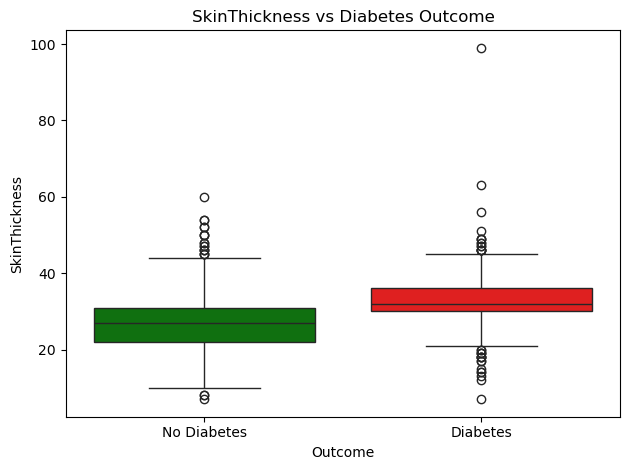

In [141]:
# SkinThickness Boxplot
ax = sns.boxplot(
    x='Outcome',
    y='SkinThickness',
    data=df,
    hue='Outcome',
    palette=palette,
    legend=False
)

ax.set_title('SkinThickness vs Diabetes Outcome')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


## Blood Pressure vs Diabetes

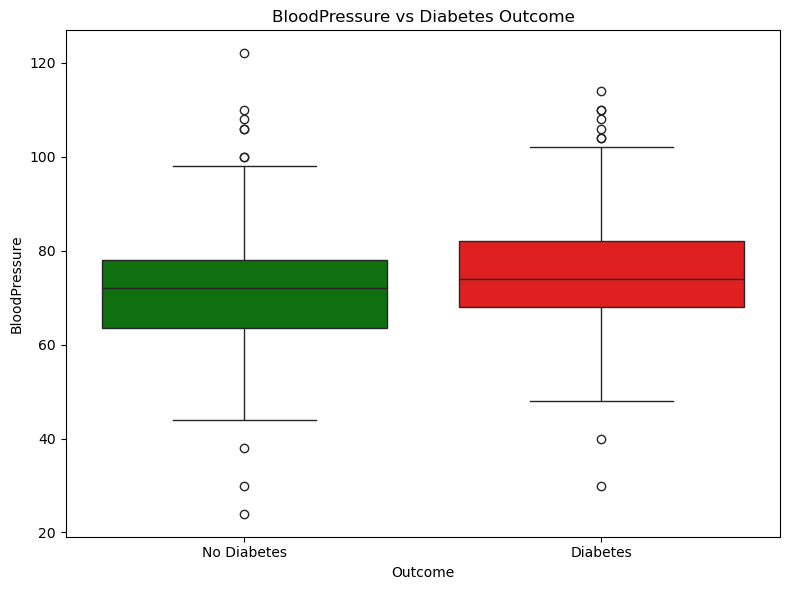

In [142]:
plt.figure(figsize=(8,6))
# BloodPressure
ax = sns.boxplot(
    x='Outcome', y='BloodPressure',
    data=df, hue='Outcome',
    palette=palette, legend=False,

)
ax.set_title('BloodPressure vs Diabetes Outcome')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

- **Patients with diabetes tend to have slightly high blood pressure than other**.

## Pregnancies and Diabetes Risk

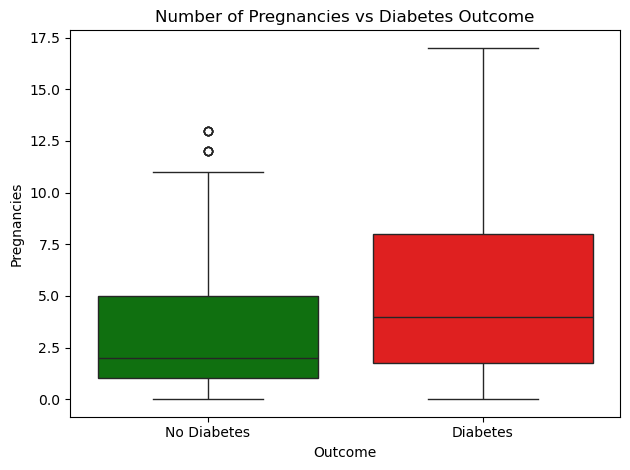

In [143]:
ax = sns.boxplot(x='Outcome', y='Pregnancies', data=df, hue= "Outcome", palette=palette, legend=False) 
ax.set_title('Number of Pregnancies vs Diabetes Outcome') 
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()

In [144]:
preg_outcome_pct =   df.groupby(['PregnancyGroup', 'Outcome'], as_index=False, observed=True).size()
preg_outcome_pct['Percentage'] = (
    preg_outcome_pct
    .groupby('PregnancyGroup', observed=False)['size']
    .transform(lambda x: (x / x.sum()) *100 )
)
preg_outcome_pct

,PregnancyGroup,Outcome,size,Percentage
0,0,0,73,65.765766
1,0,1,38,34.234234
2,1–2,0,190,79.831933
3,1–2,1,48,20.168067
4,3–5,0,129,64.500000
5,3–5,1,71,35.500000
6,6+,0,108,49.315068
7,6+,1,111,50.684932


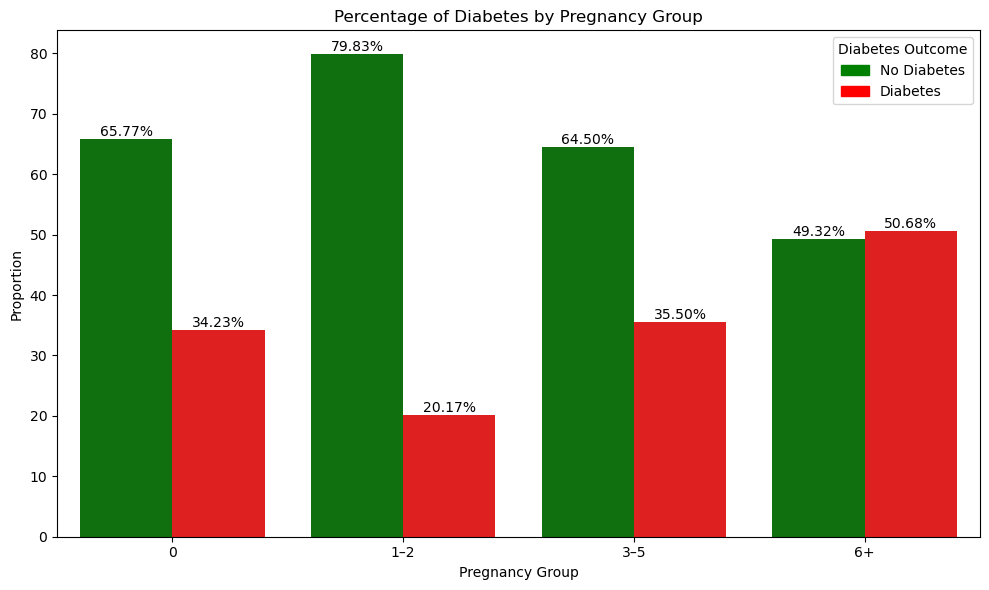

In [145]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=preg_outcome_pct,
    x='PregnancyGroup',
    y='Percentage',
    hue='Outcome',     
    palette={0: 'green', 1: 'red'})

# add bar labels
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f%%')

ax.set_title('Percentage of Diabetes by Pregnancy Group')
ax.set_ylabel('Proportion')
ax.set_xlabel('Pregnancy Group')

legend_patches = [mpatches.Patch(color='green', label='No Diabetes'),
                  mpatches.Patch(color='red', label='Diabetes')]

ax.legend(handles=legend_patches,
         title='Diabetes Outcome')
    
plt.tight_layout()
plt.show()

- **Generally, higher the number of pregnancies, higher the percentage of diabetes outcome. But no pegnancies can also happen diabetes.**

## Correlation with Diabetes Outcome

In [146]:
corr = df.corr(numeric_only= True)['Outcome'].sort_values(ascending=False)
corr

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64

**Key Correlations with Outcome:** 
- Glucose (0.47) = strongest positive correlation.
- BMI (0.29) = significant contributor.
- Age (0.24) = moderate influence.
- Insulin (0.13) = weak correlation.
  
**Interpretation:** Glucose and BMI are primary drivers for diabetes risk in this dataset.


## Correlation Heatmap

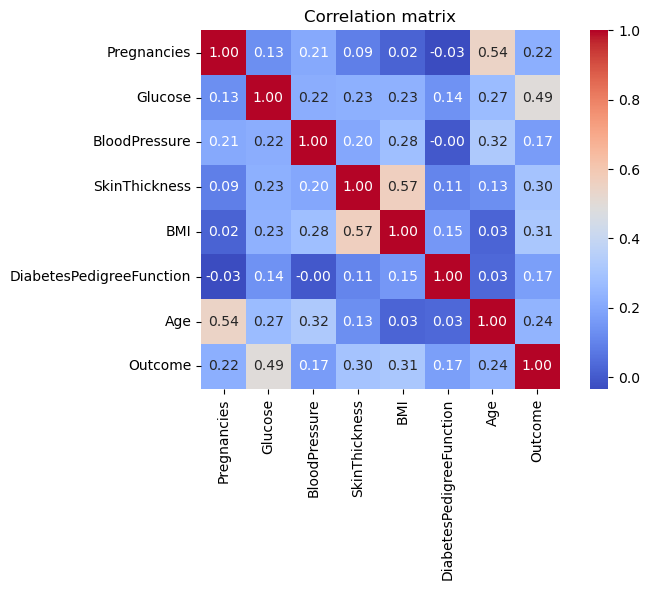

In [147]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()
plt.close()

## Multi-feature Insights 

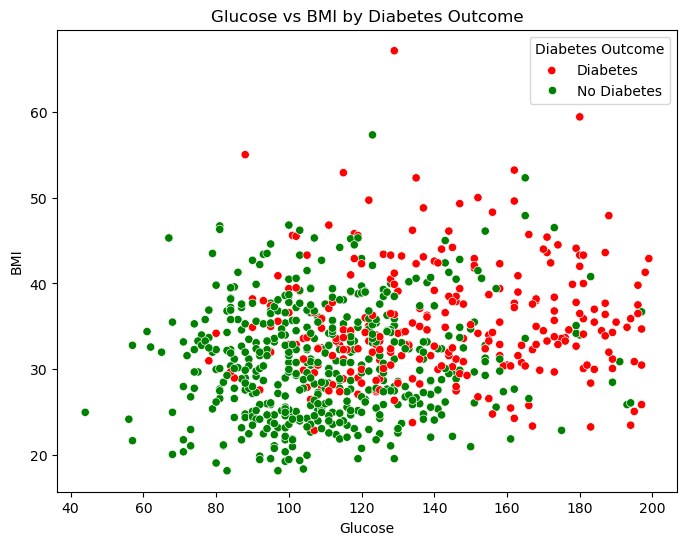

In [148]:
# Glucose vs BMI by Outcome
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome',  palette=palette, data=df)
plt.title('Glucose vs BMI by Diabetes Outcome')
plt.legend(title='Diabetes Outcome', labels=['Diabetes', 'No Diabetes'])
plt.show()

- **Individuals with both high glucose and high BMI are most likely to have diabetes. Preventive measures could focus on patients with this profile.**

## Key Insights

- Glucose level is the strongest indicator of diabetes.
- Higher BMI is associated with increased diabetes prevalence.
- Older patients show higher diabetes risk.
- Insulin and SkinThickness have missing values but still contribute useful signals after imputation.

## Conclusion
This analysis identifies glucose level as the strongest predictor of diabetes,
followed by BMI and age. Genetic predisposition also contributes to risk.
These insights highlight the importance of early screening and lifestyle
interventions for high-risk individuals.